# Demo for $c_s^2$ dark energy

In this notebook, I explore a few cases of dark energy sound speed.

In [1]:
import numpy
import camb
import matplotlib.pyplot as plt

In [2]:
# Usual dark energy with cs2 = 1, no crossing, no ppf
pks = {}
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    w0=-0.9, wa=0.1,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=1_noppf"] = pk[0]

In [3]:
# Usual dark energy with cs2 = 1, no crossing, ppf
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    dark_energy_model="ppf",
    w0=-0.9, wa=0.1,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=1_ppf"] = pk[0]

In [ ]:
# Dark energy with constant cs2 = 0.1, no crossing, no ppf
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    dark_energy_model="fluid",
    w0=-0.9, wa=0.1, cs2_0=0.1,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=0.1_noppf"] = pk[0]

In [ ]:
# Dark energy with constant cs2 = 0.1, no crossing, ppf
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    dark_energy_model="ppf",
    w0=-0.9, wa=0.1, cs2_0=0.1,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=0.1_ppf"] = pk[0]

In [7]:
# Dark energy with varying cs2 = (1 + w)/8, no crossing, no ppf
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    dark_energy_model="fluid",
    w0=-0.9, wa=0.1, cs2_0=1/8, cs2_1=1/8,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=kessence_noppf"] = pk[0]

In [8]:
# Dark energy with varying cs2 = (1 + w)/8, no crossing, ppf
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122,
    As=2e-9, ns=0.965,
    dark_energy_model="ppf",
    w0=-0.9, wa=0.1, cs2_0=1/8, cs2_1=1/8,
    mnu=0.06, omk=0, tau=0.06,
)
pars.set_matter_power(redshifts=[0], kmax=2.0)
result = camb.get_results(pars)
kh, z, pk = result.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
pks["cs2=kessence_ppf"] = pk[0]

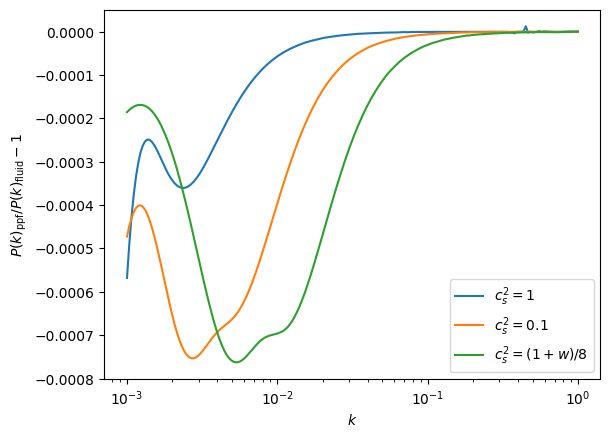

In [12]:
plt.semilogx(kh, pks["cs2=1_ppf"]/pks["cs2=1_noppf"] - 1, label=r"$c_s^2 = 1$")
plt.semilogx(kh, pks["cs2=0.1_ppf"]/pks["cs2=0.1_noppf"] - 1, label=r"$c_s^2 = 0.1$")
plt.semilogx(kh, pks["cs2=kessence_ppf"]/pks["cs2=kessence_noppf"] - 1, label=r"$c_s^2 = (1 + w)/8$")
plt.ylabel(r"$P(k)_\mathrm{ppf}/P(k)_\mathrm{fluid} - 1$")
plt.xlabel(r"$k$")
plt.legend()